In [6]:
%matplotlib inline
import pandas
import pylab as pl
from scipy.stats import ttest_ind

try:
    # import the data
    data = pandas.read_csv('stats_data.csv', delimiter=';')
    # select only the relevant columns
    data = data[['user_id', 'presented_sentence', 'transcribed_sentence', 'text_input_technique', 'total_time (ms)',
                 'wpm', 'timestamp (ISO)']]
except Exception:
    print("Error! Maybe you need to install pandas!")

In [7]:
data_chord_input = data[data['text_input_technique'] == 'C']
data_standard_input = data[data['text_input_technique'] == 'S']

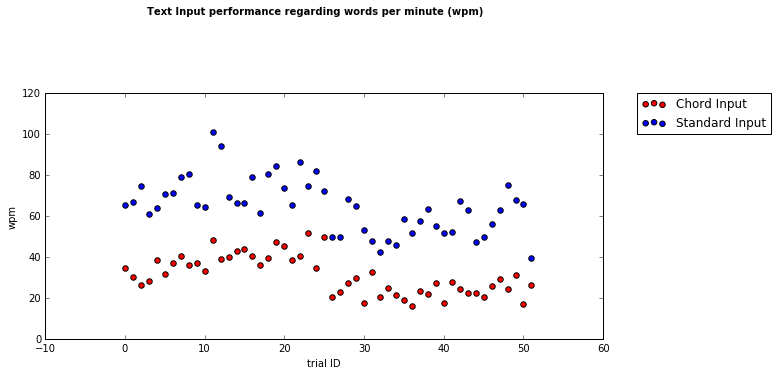

Median Chord Input: 29.8687175562
Median Standard Input: 65.227819413


In [8]:
# constant strings
MOVEMENT_TIME = 'movement_time (ms)'
NUMBER_ERRORS = 'number_of_errors'
TRIAL_ID = 'trial ID'
STANDARD_POINTER = 'Standard Pointer'
AREA_BUBBLE_POINTER = 'Area Bubble Pointer'
CIRCLE_MARKER = 'o'
RED = 'r'
GREEN = 'g'
YELLOW = 'y'
BLUE = 'b'
# size of the markers in the scatterplot
MARKER_SIZE = 30

# class that stores the data required for a scatterplot
class ScatterPlotData():
    def __init__(self, data, s, color, label):
        self.data = data
        self.s = s
        self.color = color
        self.label = label

# class that stores data required for labeling the figure
class LabelData():
    def __init__(self, title, xlabel, ylabel):
        self.title = title
        self.xlabel = xlabel
        self.ylabel = ylabel

# creates a new figure in which mulitple scatterplots will be drawn
def create_new_figure():
    # init plot creation
    current_figure = pl.figure(figsize=(10, 15));
    scatter_plot = current_figure.add_subplot(311);
    return current_figure, scatter_plot

# plot all scatter plots in one figre
def create_nested_scatter_plot(scatter_plot, data, s, marker, color, label):
    scatter_plot.scatter(range(len(data)),
                     list(data), s=s, marker=marker,
                     c=color, label=label)    

# label the figure with title, x-/y-axis description
def lable_figure(current_figure, scatter_plot, labeldata):
    # add title, name axes (with units)
    current_figure.suptitle(labeldata.title, fontweight='bold')
    scatter_plot.set_xlabel(labeldata.xlabel)
    scatter_plot.set_ylabel(labeldata.ylabel);
    pl.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0.)
    pl.show()

# draws a new scatterplot figure containing multiple nested scatter plots
def create_new_scatterplot_figure(scatterplots, labeldata):
    current_figure, scatter_plot = create_new_figure()
    for i in range(len(scatterplots)):   
        create_nested_scatter_plot(scatter_plot, scatterplots[i].data, MARKER_SIZE, scatterplots[i].s, 
                                   scatterplots[i].color, scatterplots[i].label)        
    lable_figure(current_figure, scatter_plot, labeldata)

# this method creates a simple scatterplot
def create_scatter_plot(data_x_axis, data_y_axis, title, x_label, y_label, color, marker):
    pl.scatter(data_x_axis, data_y_axis, c=color, marker=marker)
    pl.suptitle(title, fontweight='bold')
    pl.xlabel(x_label)
    pl.ylabel(y_label)

# this method prints out the median of given data
def print_median(data, label):
    print("Median " + str(label) + ": " + str(pl.median(data)))

# this method prints out the mean of given data
def print_mean(data, label):
    print("Mean " + str(label) + ": " + str(pl.mean(data)))
    
    
# data for the scatterplots that will be nested in one figure
scatterplots_data = [ScatterPlotData(data_chord_input['wpm'], CIRCLE_MARKER, RED, "Chord Input"),
                     ScatterPlotData(data_standard_input['wpm'], CIRCLE_MARKER, BLUE, "Standard Input")]

# create a scatterplot to show the error rates for both pointing techniques when using very small targets
create_new_scatterplot_figure(scatterplots_data, 
                              LabelData('Text Input performance regarding words per minute (wpm)',
                                        TRIAL_ID, 'wpm'))

print_median(data_chord_input['wpm'], 'Chord Input')
print_median(data_standard_input['wpm'], 'Standard Input')

Median Chord Input: 29.8687175562
Median Standard Input: 65.227819413
Mean Input: 31.1418464922
Mean Standard: 64.729816656


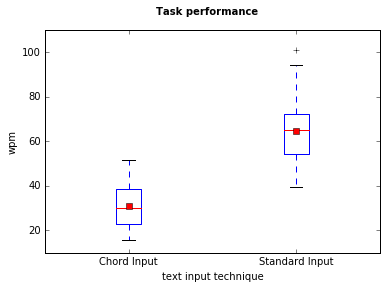

In [13]:
# this method creates a boxplot with its title and x-/y-labels
def create_boxplot(label, data, title, xlabel, ylabel):
    pl.boxplot(data, labels=label, showmeans=True);
    pl.suptitle(title, fontweight='bold')
    pl.xlabel(xlabel)
    pl.ylabel(ylabel)
    
# label the boxplot elements, get data and create a boxplot with the given data
label = ['Chord Input', 'Standard Input']
boxplot_data = [data_chord_input['wpm'], data_standard_input['wpm']]
create_boxplot(label, boxplot_data, 'Task performance', 'text input technique', 'wpm')

# print out medians and means of absolute pointing performance
print_median(data_chord_input['wpm'], "Chord Input")
print_median(data_standard_input['wpm'], "Standard Input")
print_mean(data_chord_input['wpm'], "Input")
print_mean(data_standard_input['wpm'], "Standard")

In [14]:
# calculates the p-value of a t-test given two samples
def calculate_p_value(UV1, UV2):
    _, p_value = ttest_ind(UV1, UV2)
    return p_value

# print out p-values of relative and absolute task performance
print("p-value Text entry performance: " + str(calculate_p_value(data_chord_input['wpm'],
                                                                         data_standard_input['wpm'])))

p-value Text entry performance: 1.53297007767e-27
